Data Exploration and Analysis of the new dataset in data/parlamint-at.tgz

In [1]:
#installing all packages via required txt.
#pip install -r requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from data_processing import get_data
import nltk
from transformers import AutoTokenizer
import torch
from tqdm import tqdm
import re
import spacy

nltk.download('stopwords')
from nltk.corpus import stopwords
import multiprocessing

[nltk_data] Downloading package stopwords to /home/hakiim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data loading:

In [23]:
corpus_df = get_data()

Retrieving data from ParlaMint-AT...
./data/parlamint_at_extracted/README-AT.md
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-AT-listPerson.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/00README.txt
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-taxonomy-subcorpus.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-taxonomy-parla.legislature.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-taxonomy-CHES.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-taxonomy-speaker_types.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-taxonomy-politicalOrientation.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-AT-listOrg.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/ParlaMint-AT.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/2014/ParlaMint-AT_2014-11-20-025-XXV-NRSITZ-00052.xml
./data/parlamint_at_extracted/ParlaMint-AT.TEI/2014/ParlaMint-AT_2014-02-24-025-XXV-NRSITZ-00012.xml
./data/parlamint_at_extracted

In [24]:
corpus_df.head()

ID  \
0  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
1  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
2  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
3  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049_d...   
4  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049_d...   

                                                text  \
0  Ich eröffne die 45. Sitzung des Nationalrates....   
1  Hinsichtlich der eingelangten Verhandlungsgege...   
2  Die nächste Sitzung des Nationalrates berufe i...   
3  Meine sehr geehrten Damen und Herren Abgeordne...   
4  Für diese Sitzung hat das Bundeskanzleramt übe...   

                                        Text_ID  \
0  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
1  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
2  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
3  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049   
4  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049   

                                               Title        Date         Body  \
0  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
1  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
2  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
3  Sitting Number 49, Legislative period XXV, Wed...  2014-11-19  Lower house   
4  Sitting Number 49, Legislative period XXV, Wed...  2014-11-19  Lower house   

                     Term Session Meeting     Sitting  ... Speaker_MP  \
0  Legislative period XXV       -       -  Sitting 45  ...         MP   
1  Legislative period XXV       -       -  Sitting 45  ...         MP   
2  Legislative period XXV       -       -  Sitting 45  ...         MP   
3  Legislative period XXV       -       -  Sitting 49  ...         MP   
4  Legislative period XXV       -       -  Sitting 49  ...         MP   

  Speaker_minister Speaker_party  \
0      notMinister           ÖVP   
1      notMinister           ÖVP   
2      notMinister           ÖVP   
3      notMinister           SPÖ   
4      notMinister           SPÖ   

                                  Speaker_party_name Party_status  \
0  parliamentary group of the Austrian People's P...            -   
1  parliamentary group of the Austrian People's P...            -   
2  parliamentary group of the Austrian People's P...            -   
3  parliamentary group of the Social Democratic P...    Coalition   
4  parliamentary group of the Social Democratic P...    Coalition   

       Party_orientation Speaker_ID     Speaker_name Speaker_gender  \
0  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
1  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
2  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
3            Centre-left  PAD_00145     Bures, Doris              F   
4            Centre-left  PAD_00145     Bures, Doris              F   

  Speaker_birth  
0          1957  
1          1957  
2          1957  
3          1962  
4          1962  

[5 rows x 24 columns]

In [25]:
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231759 entries, 0 to 231758
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  231759 non-null  object
 1   text                231759 non-null  object
 2   Text_ID             231759 non-null  object
 3   Title               231759 non-null  object
 4   Date                231759 non-null  object
 5   Body                231759 non-null  object
 6   Term                231759 non-null  object
 7   Session             231759 non-null  object
 8   Meeting             231759 non-null  object
 9   Sitting             231759 non-null  object
 10  Agenda              231759 non-null  object
 11  Subcorpus           231759 non-null  object
 12  Lang                231759 non-null  object
 13  Speaker_role        231759 non-null  object
 14  Speaker_MP          231759 non-null  object
 15  Speaker_minister    231759 non-null  object
 16  Sp

# Preprocessing

Normalization

In [26]:
tqdm.pandas()

# common phrases to strip
common_phrases = [
    # Ceremonial/formal openings
    'sehr geehrte damen und herren',
    'meine damen und herren',
    'liebe kolleginnen und kollegen',
    'werte kolleginnen und kollegen',
    'geschätzte damen und herren',
    'liebe zuseherinnen und zuseher',
    'geschätzte zuseherinnen und zuseher',
    'ich darf sie begrüßen',
    'ich begrüße sie herzlich',
    'herzlich willkommen',

    # Parliamentary speaker roles
    'sehr geehrter herr präsident',
    'sehr geehrte frau präsidentin',
    'Herr Minister',
    'herr präsident',
    'frau präsidentin',
    'herr bundespräsident',
    'frau bundesministerin',
    'herr bundesminister',
    'herr bundeskanzler',
    'herr staatssekretär',
    'frau staatssekretärin',
    'frau abgeordnete',
    'herr abgeordneter',
    'nächster redner',
    'nächste rednerin',
    'zu wort gemeldet ist',
    'die nächste rednerin ist',
    'die nächste sprecherin ist',
    'ich erteile das wort',
    'sie haben das wort',
    'bitte sehr',
    'danke schön',
    'vielen dank',
    'ich danke ihnen',

    # Procedural expressions
    'ich darf',
    'ich danke',
    'ich ersuche',
    'ich melde mich',
    'ich möchte betonen',
    'ich möchte sagen',
    'ich sage',
    'ich glaube',
    'ich denke',
    'ich bin der meinung',
    'ich finde',
    'ich möchte hinzufügen',
    'ich möchte festhalten',
    'ich möchte hervorheben',

    # Common contextless fillers
    'dame',
    'herr',
    'herren',
    'Herr Kollege',
    'Punkt Tagesordnung',
    'dr',
    'abgeordneter',
    'geehrten dame',
    'ge',
    'Bundesregierung',
    'abgeordneter dr',
    'abgeordneter',
    'verehrten damen'
    'bitte',
    'danke',
    'sehr',
    'wichtig',
    'eigentlich',
    'nämlich',
    'gut',
    'sagen',
    'wissen',
    'müssen',
    'gehen',
    'kommen',
    'sehen',
    'geben',
    'nehmen',
    'sollen',
    'machen',
    'haben',
    'werden',
    'können',
    'müssen',
    'dürfen',
    'ja',
    'nein',
    'immer',
    'heute',
    'morgen',
    'gestern',
    'weiter',
    'mehr',
    'weniger',
    'vielleicht',
    'natürlich',
    'eigentlich',
    'wirklich',
    'nächster',
    'nächste',
    'österreich',  # optionally skip if you're doing thematic analysis, but useful to remove if too dominant
]

# lowercase and remove fixed phrases
def normalize_text(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ''
    text = text.lower().strip()
    for phrase in common_phrases:
        text = text.replace(phrase, '')
    return text

corpus_df['text'] = corpus_df['text'].progress_apply(normalize_text)
corpus_df = corpus_df[corpus_df['text'].str.strip() != '']


100%|██████████| 231759/231759 [00:30<00:00, 7515.38it/s]


'Tokenize the text

In [27]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")

# autodetect device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

texts = corpus_df['text'].astype(str).fillna('').str.strip().tolist()

batch_size = 32
tokenized_texts = []
for i in tqdm(range(0, len(texts), batch_size), desc="Tokenizing"):
    batch = texts[i:i+batch_size]
    tokens = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
    decoded = tokenizer.batch_decode(tokens['input_ids'], skip_special_tokens=True)
    tokenized_texts.extend(decoded)

corpus_df['text'] = tokenized_texts

Tokenizing: 100%|██████████| 7243/7243 [02:07<00:00, 56.79it/s]


Lemmatize the texts

In [28]:
nlp = spacy.load("de_core_news_sm")

# Prepare your texts
texts = corpus_df['text'].astype(str).fillna('').tolist()

# Function to lemmatize a batch
def lemmatize_batch(docs):
    for doc in docs:
        lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
        yield ' '.join(lemmas)

n_cores = multiprocessing.cpu_count()
n_process = max(1, n_cores - 1)
print(f"Running with {n_process} processes")

# Run spaCy in parallel (use n_process > 1)
lemmatized_texts = list(
    tqdm(
        lemmatize_batch(nlp.pipe(texts, n_process=n_process, batch_size=100)),  # Adjust n_process as needed
        total=len(texts),
        desc="Lemmatizing"
    )
)

# Assign back to DataFrame
corpus_df['text'] = lemmatized_texts

Running with 11 processes


Lemmatizing:   0%|          | 0/231757 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_

Remove german stop words

In [29]:
GERMAN_STOPWORDS = set(stopwords.words('german'))

def remove_stopwords_only(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ''
    tokens = re.findall(r'\b\w+\b', text)
    return ' '.join(t for t in tokens if t.lower() not in GERMAN_STOPWORDS)

corpus_df['text'] = corpus_df['text'].progress_apply(remove_stopwords_only)
corpus_df = corpus_df[corpus_df['text'].str.strip() != '']

100%|██████████| 231757/231757 [00:08<00:00, 26719.31it/s]


# Load data if preprocessing already done

In [30]:
# corpus_df = pd.read_csv("./data/corpus.csv")

In [31]:
corpus_df.isnull().sum()

ID                    0
text                  0
Text_ID               0
Title                 0
Date                  0
Body                  0
Term                  0
Session               0
Meeting               0
Sitting               0
Agenda                0
Subcorpus             0
Lang                  0
Speaker_role          0
Speaker_MP            0
Speaker_minister      0
Speaker_party         0
Speaker_party_name    0
Party_status          0
Party_orientation     0
Speaker_ID            0
Speaker_name          0
Speaker_gender        0
Speaker_birth         0
dtype: int64

In [32]:
corpus_df.to_csv('./data/corpus.csv', index=False)

In [33]:
corpus_df.head()

ID  \
0  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
1  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
2  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045_d...   
3  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049_d...   
4  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049_d...   

                                                text  \
0  eröffnen 45 Sitzung nationalrates verhindern m...   
1  hinsichtlich einlangt verhandlungsnständ zuwei...   
2  Sitzung nationalrates berufen Donnerstag 23 Ok...   
3  ehrt n en abordnet vizekanzl wünschen schön en...   
4  Sitzung Bundeskanzleramt Vertretung Mitglied B...   

                                        Text_ID  \
0  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
1  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
2  ParlaMint-AT_2014-10-22-025-XXV-NRSITZ-00045   
3  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049   
4  ParlaMint-AT_2014-11-19-025-XXV-NRSITZ-00049   

                                               Title        Date         Body  \
0  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
1  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
2  Sitting Number 45, Legislative period XXV, Wed...  2014-10-22  Lower house   
3  Sitting Number 49, Legislative period XXV, Wed...  2014-11-19  Lower house   
4  Sitting Number 49, Legislative period XXV, Wed...  2014-11-19  Lower house   

                     Term Session Meeting     Sitting  ... Speaker_MP  \
0  Legislative period XXV       -       -  Sitting 45  ...         MP   
1  Legislative period XXV       -       -  Sitting 45  ...         MP   
2  Legislative period XXV       -       -  Sitting 45  ...         MP   
3  Legislative period XXV       -       -  Sitting 49  ...         MP   
4  Legislative period XXV       -       -  Sitting 49  ...         MP   

  Speaker_minister Speaker_party  \
0      notMinister           ÖVP   
1      notMinister           ÖVP   
2      notMinister           ÖVP   
3      notMinister           SPÖ   
4      notMinister           SPÖ   

                                  Speaker_party_name Party_status  \
0  parliamentary group of the Austrian People's P...            -   
1  parliamentary group of the Austrian People's P...            -   
2  parliamentary group of the Austrian People's P...            -   
3  parliamentary group of the Social Democratic P...    Coalition   
4  parliamentary group of the Social Democratic P...    Coalition   

       Party_orientation Speaker_ID     Speaker_name Speaker_gender  \
0  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
1  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
2  Centre-right to right  PAD_02822  Kopf, Karlheinz              M   
3            Centre-left  PAD_00145     Bures, Doris              F   
4            Centre-left  PAD_00145     Bures, Doris              F   

  Speaker_birth  
0          1957  
1          1957  
2          1957  
3          1962  
4          1962  

[5 rows x 24 columns]

In [34]:
corpus_df.duplicated().sum()

np.int64(0)

In [35]:
corpus_df['speech_length'] = corpus_df['text'].apply(lambda x: len(str(x).split()))
corpus_df['speech_length'].describe()

count    231413.000000
mean         62.226815
std          64.158249
min           1.000000
25%           5.000000
50%          22.000000
75%         140.000000
max         211.000000
Name: speech_length, dtype: float64

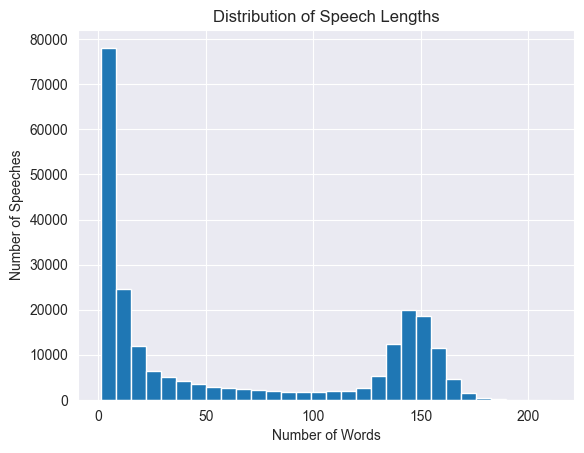

In [36]:
corpus_df['speech_length'].hist(bins=30)
plt.xlabel('Number of Words')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Speech Lengths')
plt.show()

In [37]:
# Compute average speech length
avg_speech_with_names = corpus_df.groupby('Speaker_ID').agg({
    'speech_length': 'mean',
    'Speaker_name': 'first',
    'Speaker_party': 'first',
}).rename(columns={'speech_length': 'avg_speech_length'})
# Sort and select top N
top_speaker_amount = 10
topk_df = avg_speech_with_names.sort_values(by='avg_speech_length', ascending=False).head(top_speaker_amount)

# Use Speaker_name as index for plotting
topk_df = topk_df.set_index('Speaker_name')
topk_df

avg_speech_length Speaker_party
Speaker_name                                               
Rauskala, Iris                          173.0             -
Ban, Ki-moon                            166.0             -
Heide, Hannes                           163.0           SPÖ
Vollath, Bettina                        162.0           SPÖ
List, Daniela                           161.5           ÖVP
Graswander-Hainz, Karoline              159.0           SPÖ
Maury Pasquier, Liliane                 158.5             -
Danninger, Jochen                       158.5             -
Voggenhuber, Johannes                   158.0         Grüne
Schmidt, Claudia                        158.0           ÖVP

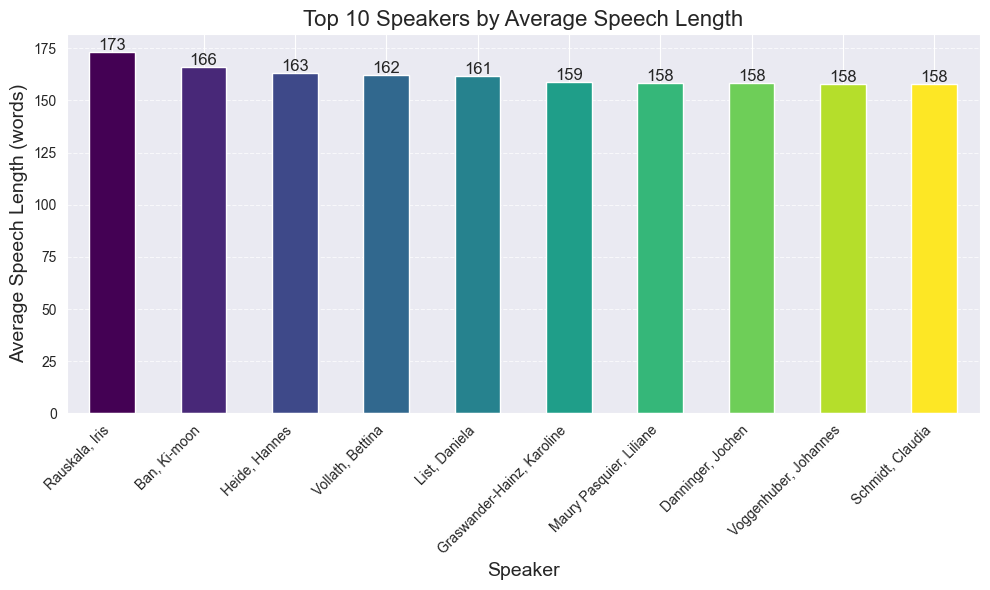

In [38]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, top_speaker_amount))
topk_df['avg_speech_length'].plot(kind='bar', color=colors)

plt.title(f'Top {top_speaker_amount} Speakers by Average Speech Length', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Average Speech Length (words)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(topk_df['avg_speech_length']):
    plt.text(i, v + 1, int(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [39]:
party_counts = corpus_df['Speaker_party'].value_counts()
party_counts

Speaker_party
SPÖ         77805
ÖVP         72442
FPÖ         48394
Grüne       16441
BZÖ          4493
-            3852
NEOS         3561
LIF          1918
STRONACH     1611
JETZT         617
GRÜNE         279
Name: count, dtype: int64

In [40]:
# group by party and sum the speech lengths
total_speech_party = corpus_df.groupby('Speaker_party')['speech_length'].sum().sort_values(ascending=False)
total_speech_party

Speaker_party
SPÖ         4046040
ÖVP         3996788
FPÖ         2769561
Grüne       1722760
BZÖ          492019
NEOS         450474
-            399807
LIF          214972
STRONACH     202297
JETZT         72526
GRÜNE         32850
Name: speech_length, dtype: int64

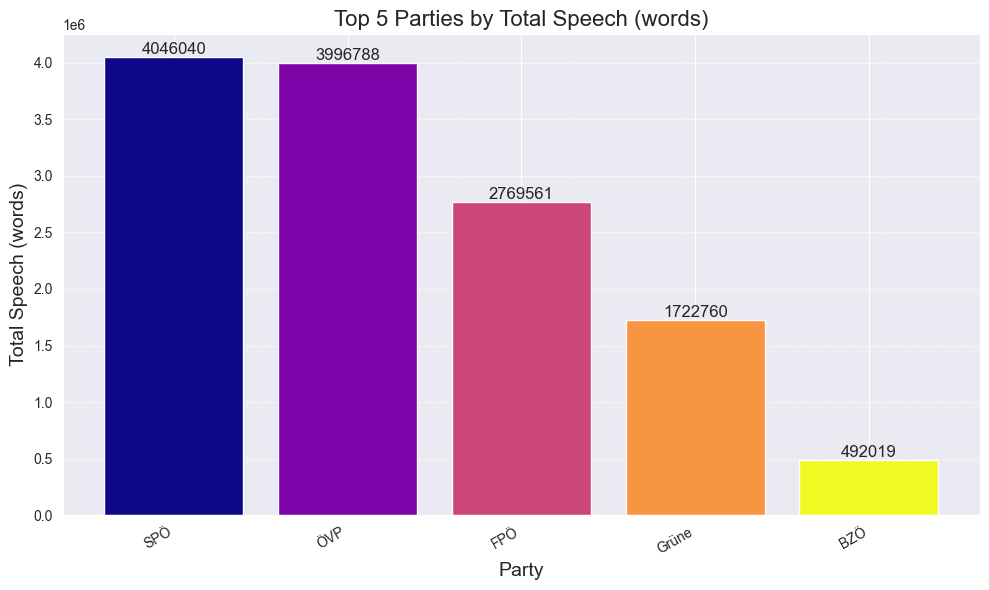

In [41]:
# Select top N parties and plot
t_speech_part_amt = 5
topk_party = total_speech_party.head(t_speech_part_amt)
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, t_speech_part_amt))
bars = plt.bar(topk_party.index, topk_party.values, color=colors)
plt.title(f'Top {t_speech_part_amt} Parties by Total Speech (words)', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Total Speech (words)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, int(height), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()


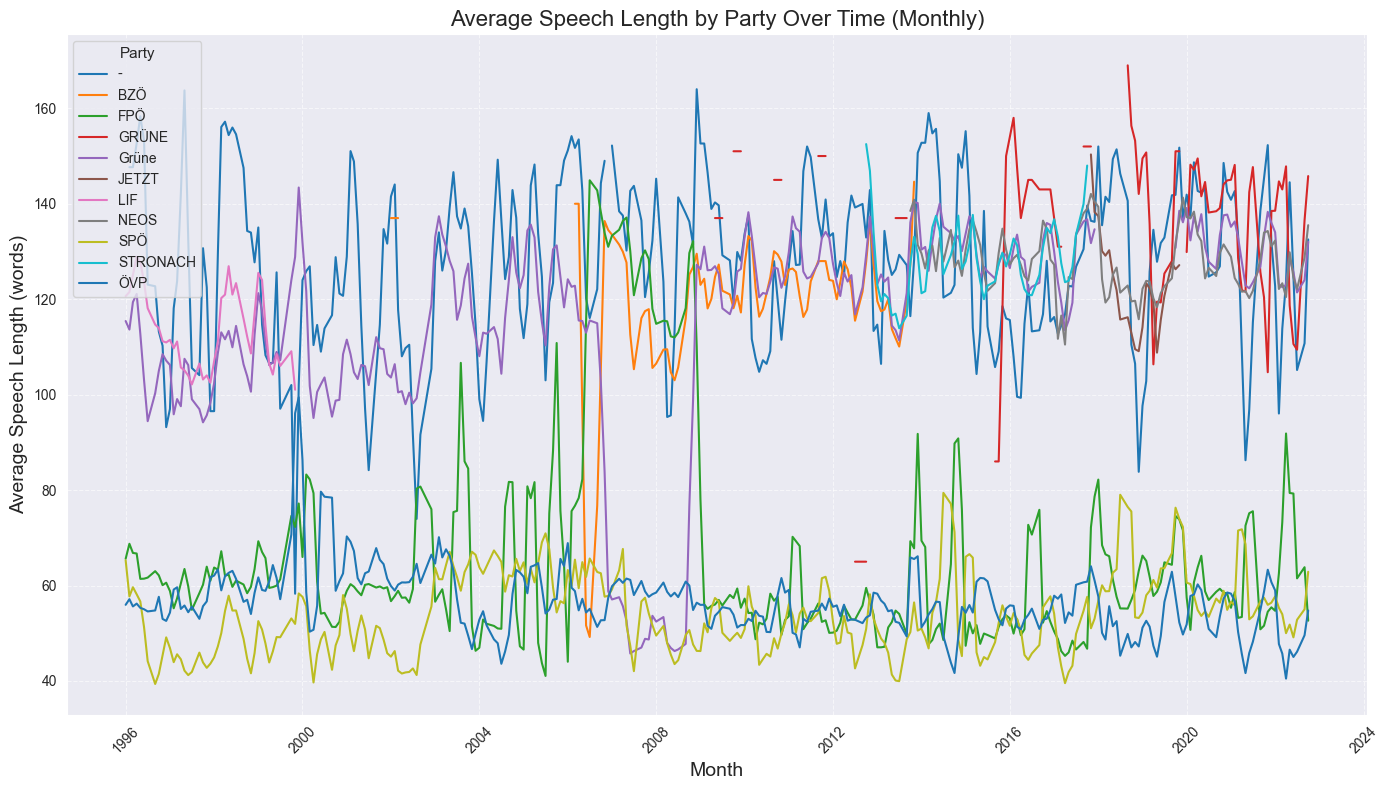

In [42]:
# Ensure 'Date' is in datetime format
corpus_df['Date'] = pd.to_datetime(corpus_df['Date'])
corpus_df['Month'] = corpus_df['Date'].dt.to_period('M').dt.to_timestamp()
if 'speech_length' not in corpus_df.columns:
    corpus_df['speech_length'] = corpus_df['text'].str.split().str.len()

# Group by month and party
monthly_avg_df = corpus_df.groupby(['Month', 'Speaker_party'])['speech_length'].mean().reset_index()

# Pivot so each party has its own column
pivot_df = monthly_avg_df.pivot(index='Month', columns='Speaker_party', values='speech_length')
pivot_df = pivot_df.rolling(window=3, min_periods=1).mean()

# Plotting
plt.figure(figsize=(14, 8))
for party in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[party], label=party)

plt.title('Average Speech Length by Party Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Speech Length (words)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

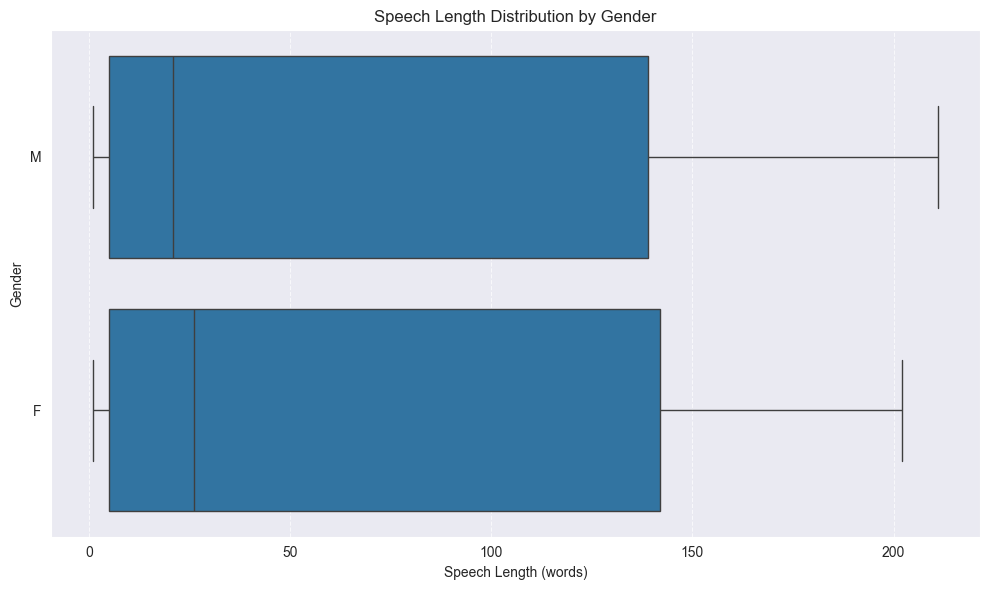

In [43]:
# speach distribution by gender for each party
plt.figure(figsize=(10, 6))
sns.boxplot(data=corpus_df, y='Speaker_gender', x='speech_length')

plt.title('Speech Length Distribution by Gender')
plt.ylabel('Gender')
plt.xlabel('Speech Length (words)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.xlim(0, 2500)
plt.tight_layout()
plt.show()

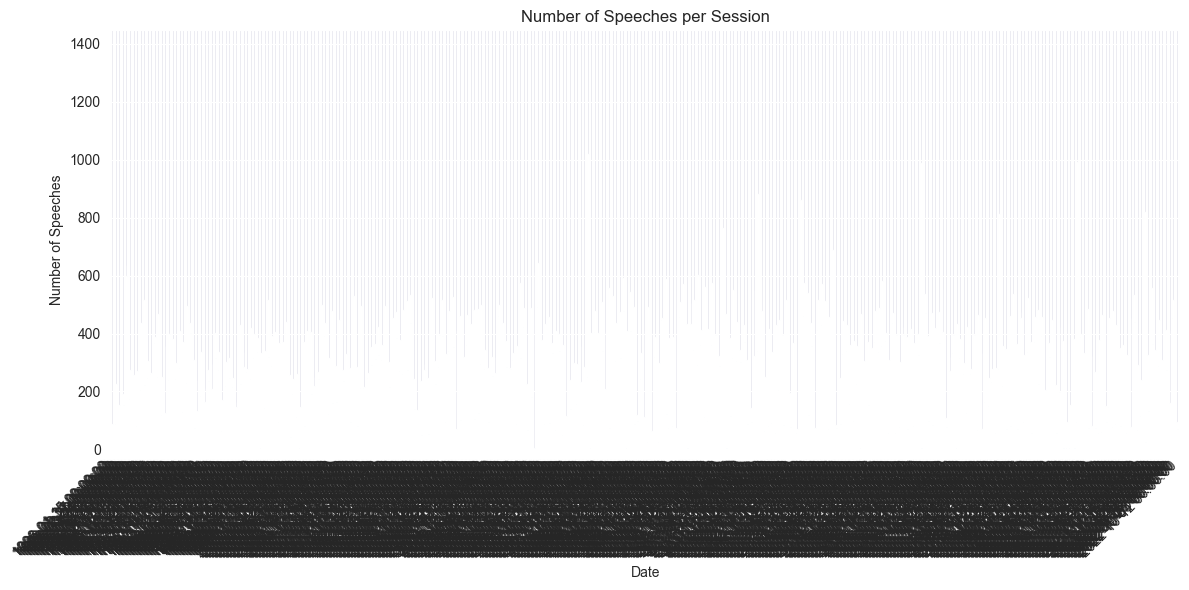

In [44]:
speech_counts = corpus_df.groupby('Date').size()

plt.figure(figsize=(12, 6))
speech_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Speeches per Session')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

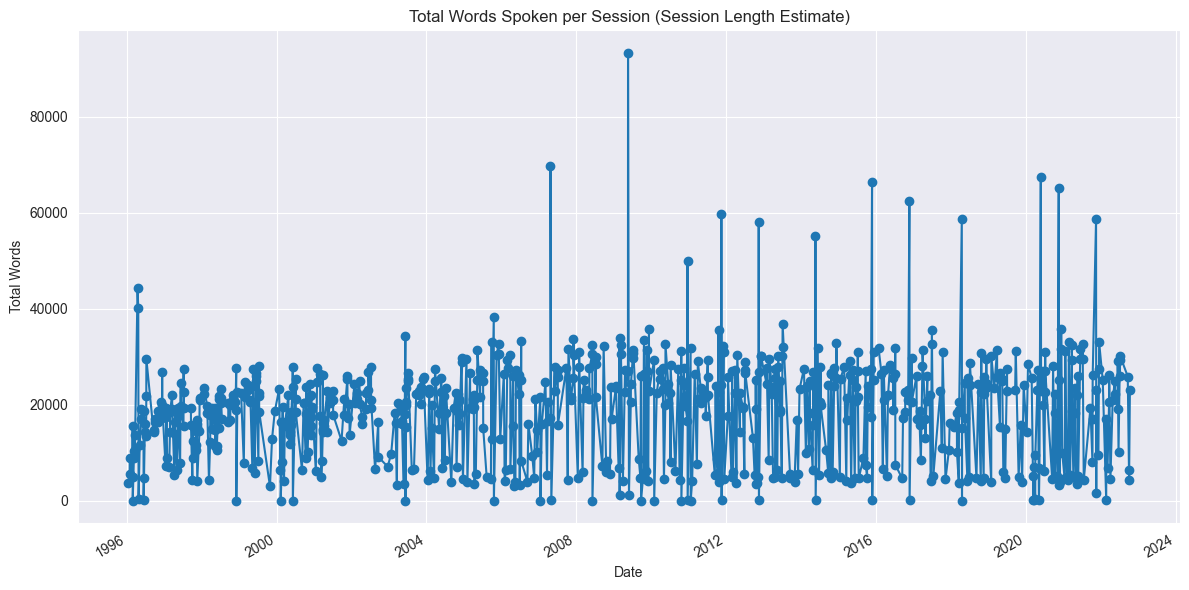

In [45]:
session_length = corpus_df.groupby('Date')['speech_length'].sum()

plt.figure(figsize=(12, 6))
session_length.plot(kind='line', marker='o')

plt.title('Total Words Spoken per Session (Session Length Estimate)')
plt.xlabel('Date')
plt.ylabel('Total Words')
plt.grid(True)
plt.tight_layout()
plt.show()

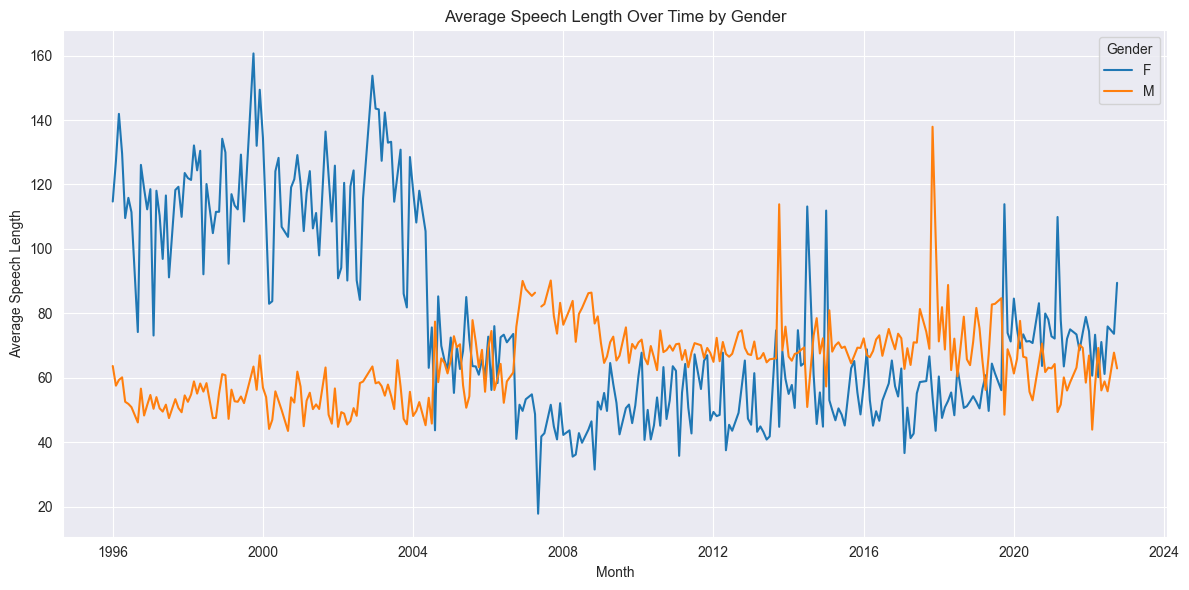

In [46]:
corpus_df['Month'] = corpus_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_gender = corpus_df.groupby(['Month', 'Speaker_gender'])['speech_length'].mean().reset_index()
pivot_gender = monthly_gender.pivot(index='Month', columns='Speaker_gender', values='speech_length')

plt.figure(figsize=(12, 6))
for gender in pivot_gender.columns:
    plt.plot(pivot_gender.index, pivot_gender[gender], label=gender)

plt.title('Average Speech Length Over Time by Gender')
plt.xlabel('Month')
plt.ylabel('Average Speech Length')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# get unique parties
parties = corpus_df['Speaker_party'].unique().tolist()

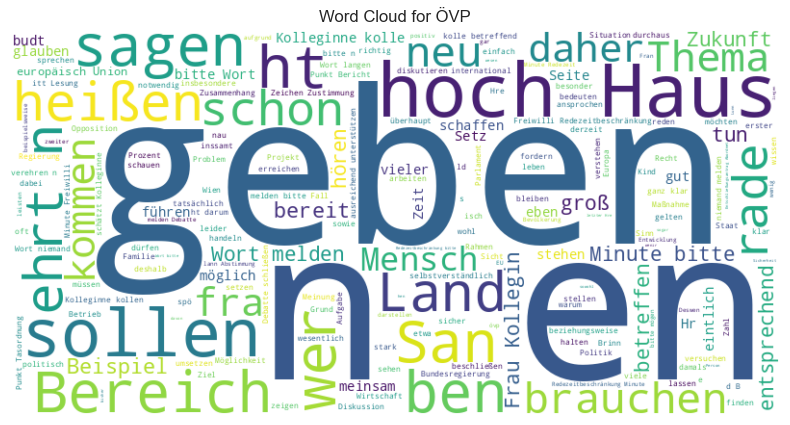

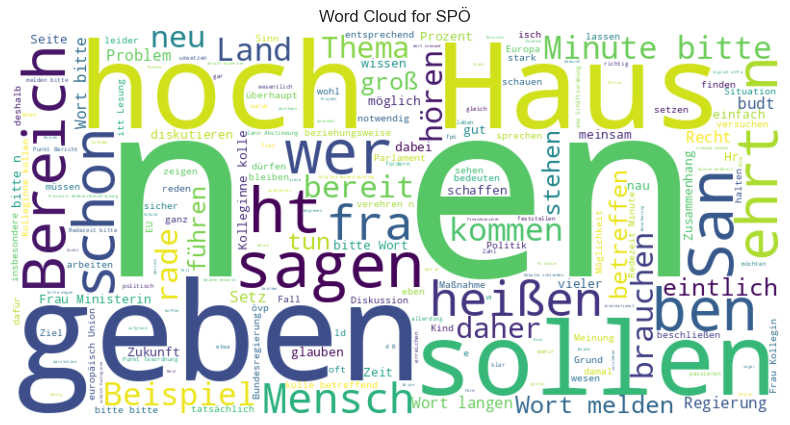

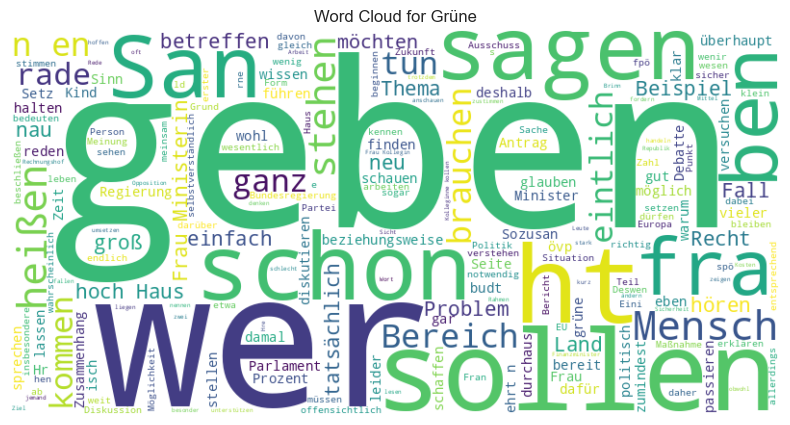

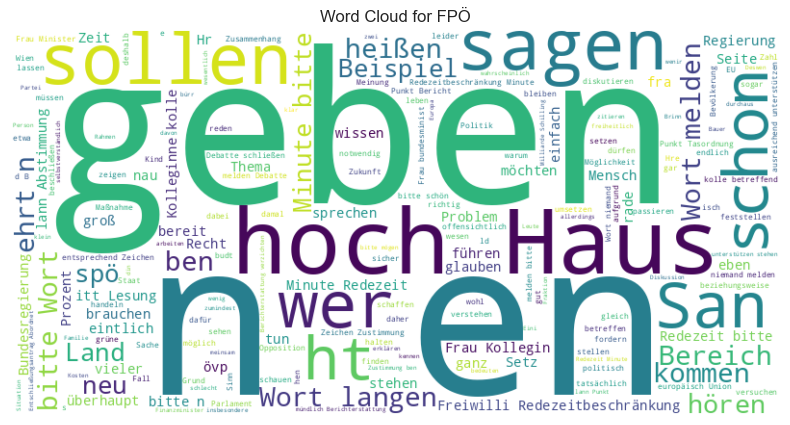

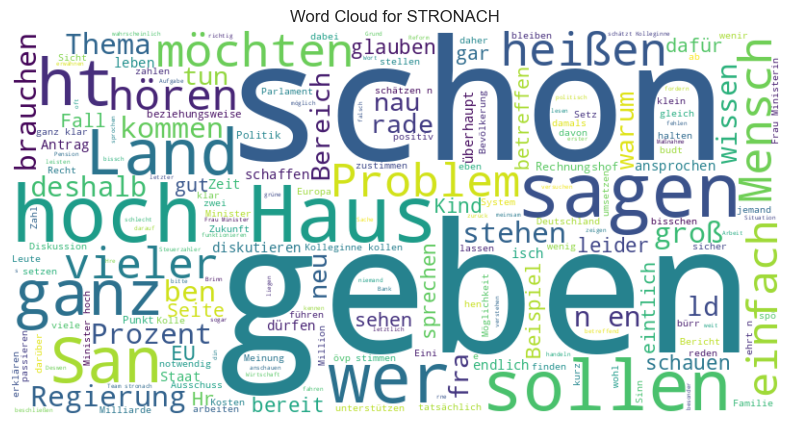

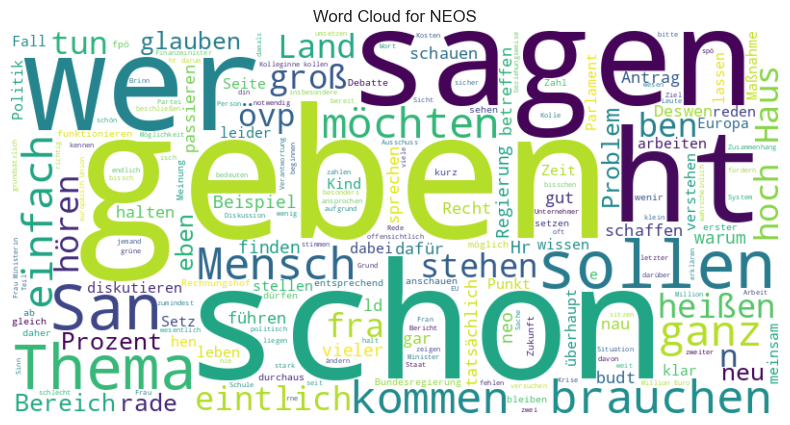

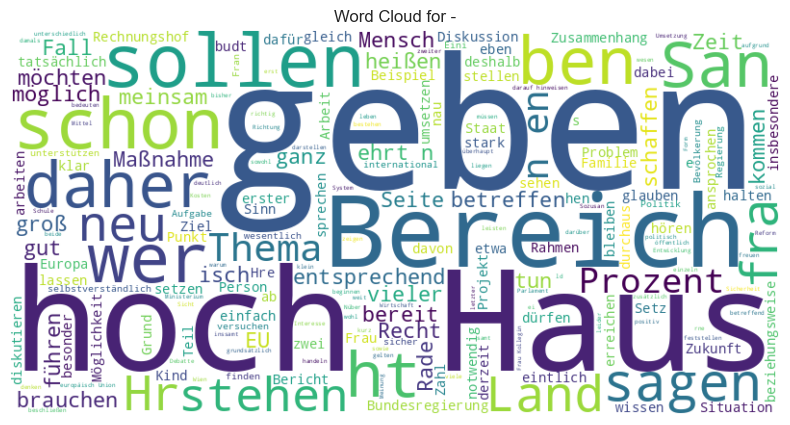

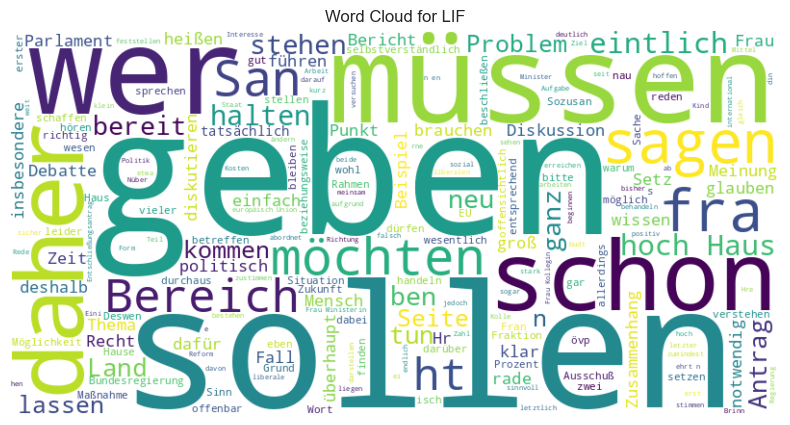

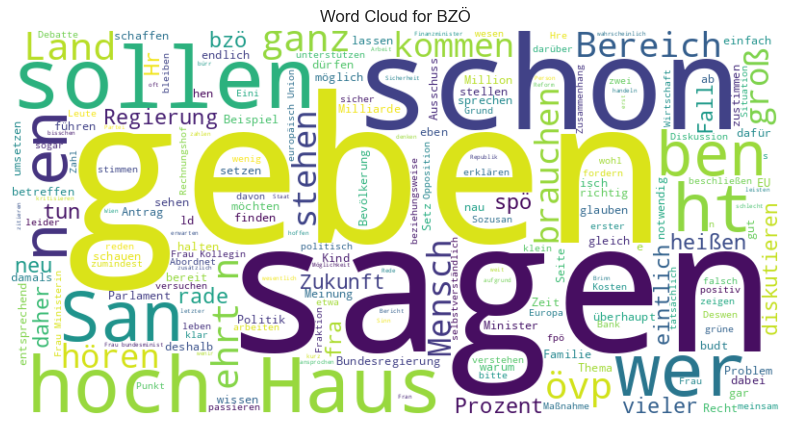

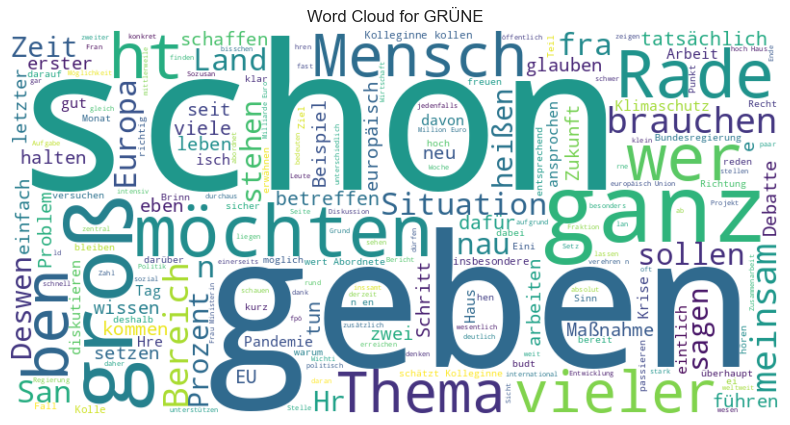

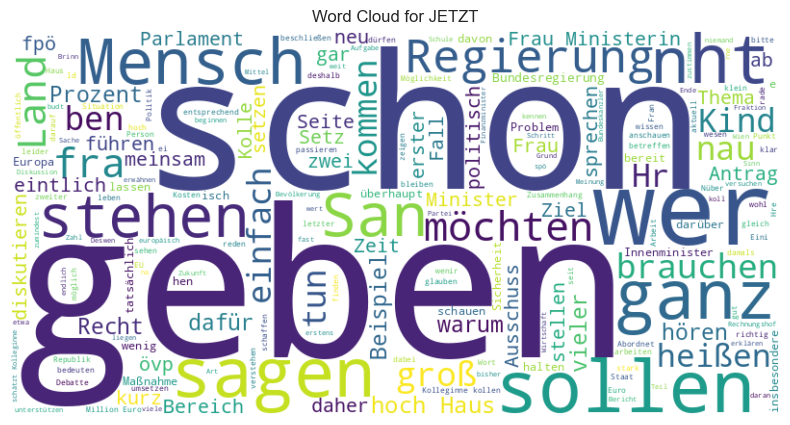

In [57]:
for party in parties:
    party_text = ' '.join(corpus_df[corpus_df['Speaker_party'] == party]['text'].dropna())

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(party_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {party}')
    plt.show()

In [48]:
word_freq = wordcloud.words_  # This is a dict: {word: normalized_frequency}

# Get a list of words
words = list(word_freq.keys())
words

['n en',
 'geben',
 'hoch Haus',
 'sollen',
 'sagen',
 'ht',
 'San',
 'wer',
 'ben',
 'Bereich',
 'schon',
 'ehrt n',
 'heißen',
 'fra',
 'Mensch',
 'Beispiel',
 'Land',
 'Minute bitte',
 'kommen',
 'neu',
 'brauchen',
 'rade',
 'hören',
 'bereit',
 'Thema',
 'daher',
 'Wort melden',
 'betreffen',
 'groß',
 'eintlich',
 'tun',
 'stehen',
 'führen',
 'Wort langen',
 'Setz',
 'Wort bitte',
 'Regierung',
 'Problem',
 'Recht',
 'budt',
 'Frau Ministerin',
 'Hr',
 'gut',
 'vieler',
 'einfach',
 'Zukunft',
 'glauben',
 'Zeit',
 'schaffen',
 'meinsam',
 'Seite',
 'wissen',
 'möglich',
 'diskutieren',
 'bitte n',
 'Zusammenhang',
 'nau',
 'Kolleginne kolle',
 'bitte Wort',
 'dabei',
 'Prozent',
 'beziehungsweise',
 'eben',
 'leider',
 'Fall',
 'Politik',
 'halten',
 'Diskussion',
 'notwendig',
 'Maßnahme',
 'Kind',
 'überhaupt',
 'versuchen',
 'Möglichkeit',
 'bitte bitte',
 'sehen',
 'finden',
 'sprechen',
 'lassen',
 'entsprechend',
 'setzen',
 'Kolleginne kollen',
 'bedeuten',
 'reden',
 'd

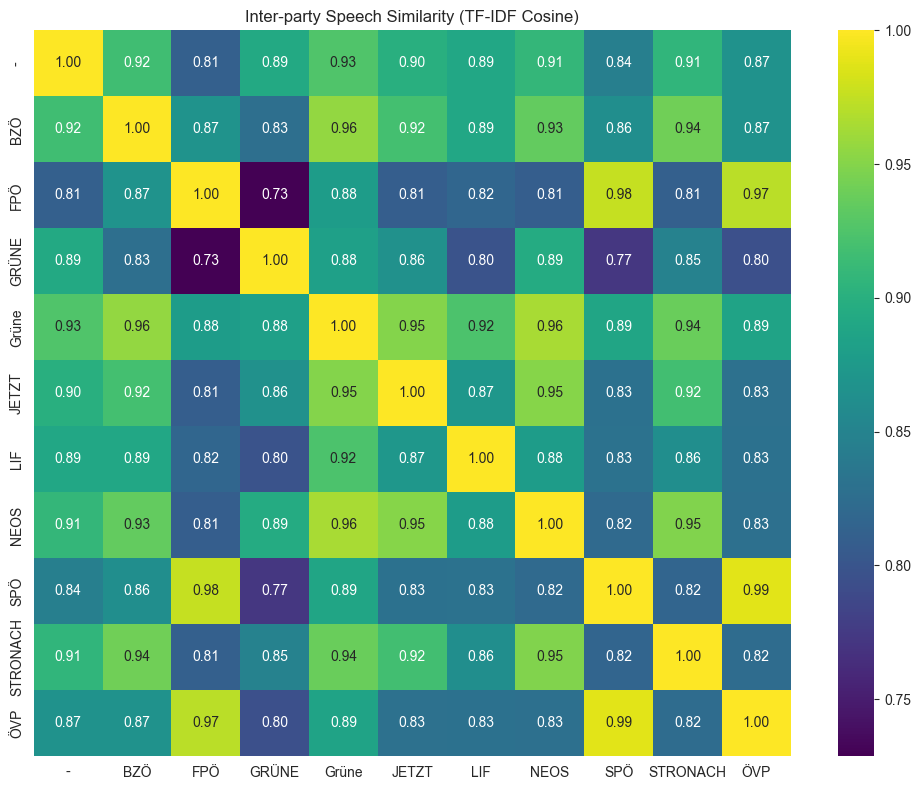

In [49]:
party_texts = corpus_df.groupby('Speaker_party')['text'].apply(lambda texts: ' '.join(texts.dropna()))

# vectorizing using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(party_texts)

# cosine similarity
similarity = cosine_similarity(tfidf_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity, xticklabels=party_texts.index, yticklabels=party_texts.index, annot=True, fmt=".2f", cmap='viridis')

plt.title('Inter-party Speech Similarity (TF-IDF Cosine)')
plt.tight_layout()
plt.show()
